## Numpy

In [1]:
import numpy as np
np.__version__

'2.3.1'

In [2]:
calificaciones = np.array([7, 6, 9, 8, 8, 5, 7])
calificaciones

array([7, 6, 9, 8, 8, 5, 7])

## Matplotlib

In [3]:
import matplotlib
matplotlib.__version__

'3.10.3'

In [4]:
import matplotlib.pyplot as plt

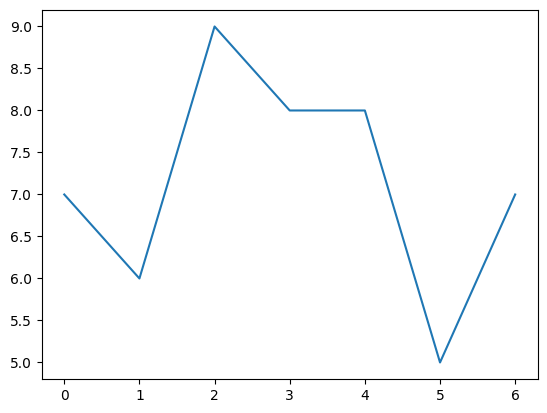

In [5]:
plt.plot(calificaciones)

## Pandas

In [6]:
import pandas as pd
pd.__version__

'2.3.0'

In [7]:
# repo con datasets: https://github.com/mwaskom/seaborn-data
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv', encoding='utf-8')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df['total_bill'].mean()

np.float64(19.78594262295082)

## Histograma

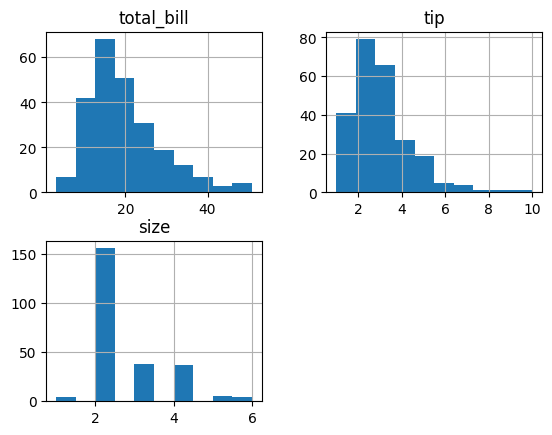

In [9]:
df.hist();

<Axes: >

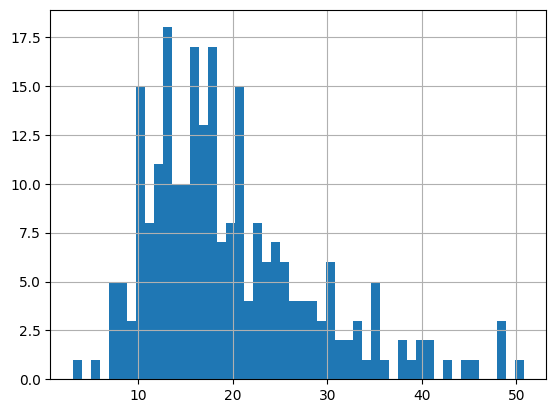

In [10]:
df['total_bill'].hist(bins=50)

## Curva de densidad kde

<Axes: ylabel='Density'>

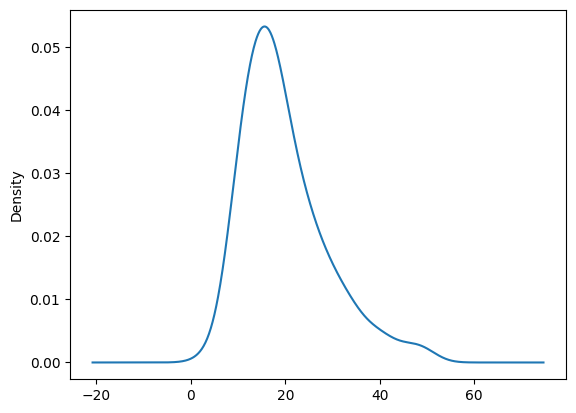

In [11]:
df['total_bill'].plot.density()

Text(0.5, 1.0, 'Distribución del gasto total_bill por smoker')

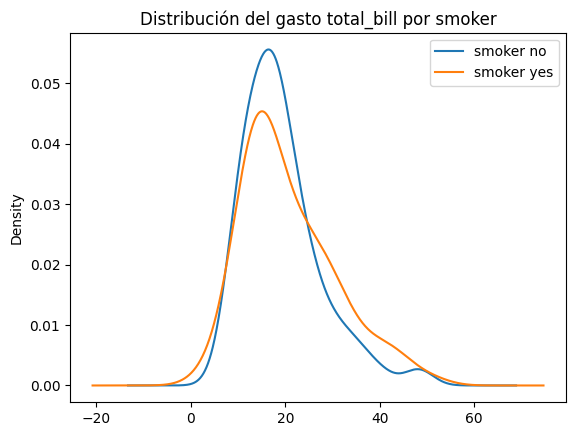

In [12]:
df[df['smoker'] == 'No']['total_bill'].plot.kde(label='smoker no')
df[df['smoker'] == 'Yes']['total_bill'].plot.kde(label='smoker yes')
plt.legend()
plt.title('Distribución del gasto total_bill por smoker')

## violinplot

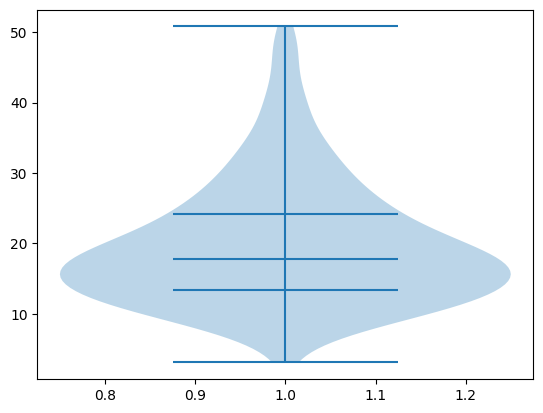

In [13]:
plt.violinplot(dataset= df["total_bill"], vert = True, quantiles = [0.25, 0.50, 0.75]);

## Boxplot

<Axes: >

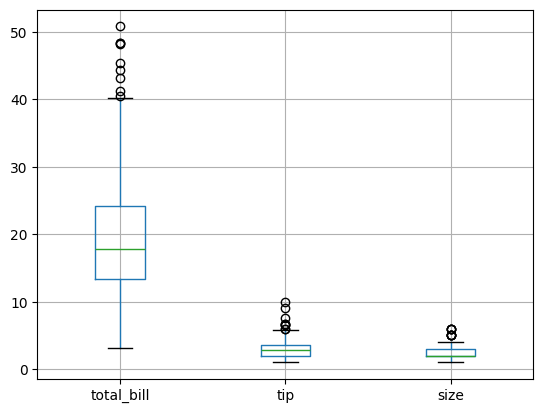

In [14]:
df.boxplot()

<Axes: >

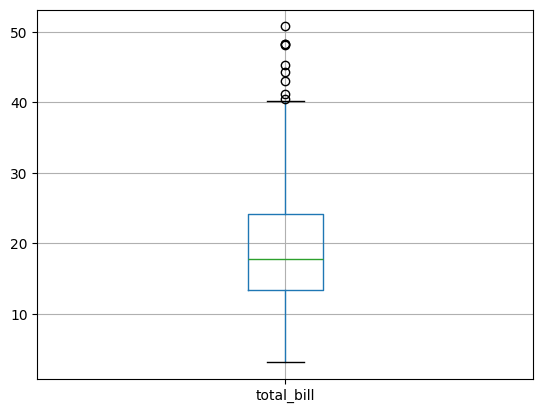

In [15]:
df.boxplot(column=['total_bill'])
# df.boxplot(column=['total_bill', 'tip'])

<Axes: title={'center': 'total_bill'}, xlabel='day'>

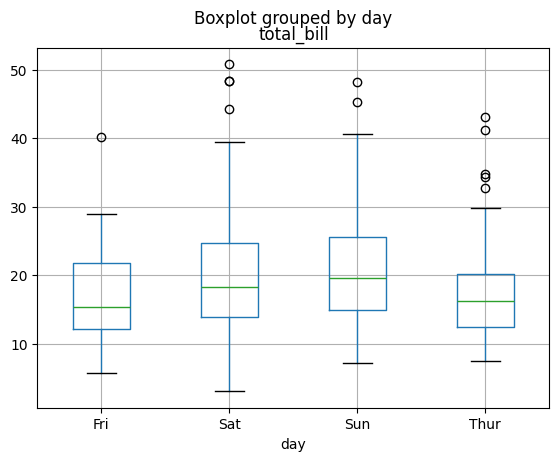

In [16]:
df.boxplot(column='total_bill', by='day')

<Axes: >

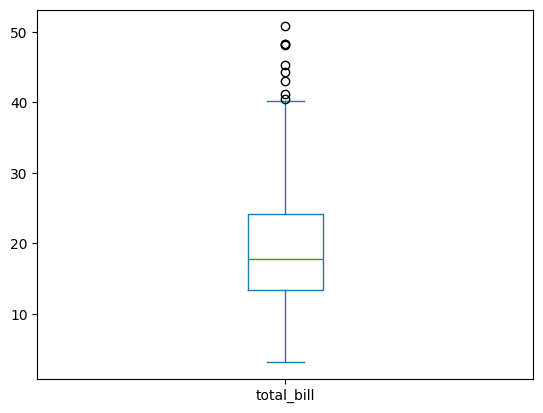

In [17]:
df.plot.box(column='total_bill')

## Líneas

<Axes: >

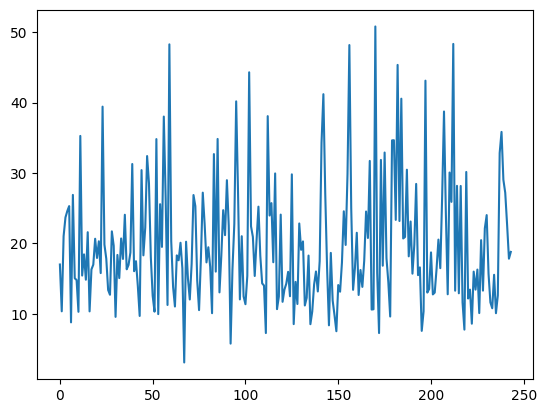

In [18]:
# lo ideal es agruparlo
df['total_bill'].plot.line()

<Axes: xlabel='day'>

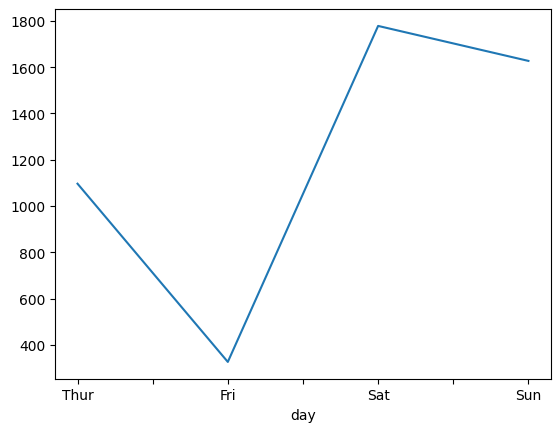

In [19]:
df.groupby('day')['total_bill'].sum() \
    .reindex(['Thur', 'Fri', 'Sat', 'Sun']) \
    .plot.line()

<Axes: xlabel='day'>

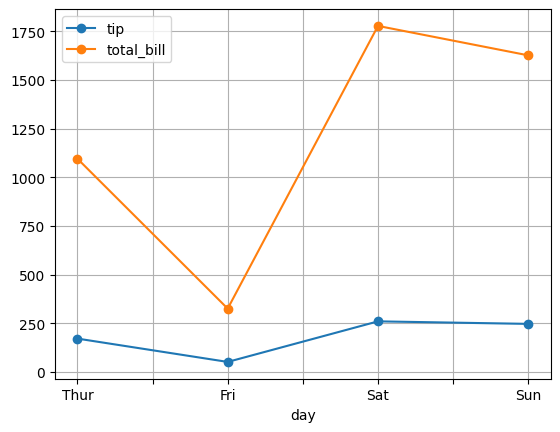

In [20]:
df.groupby('day')[['tip', 'total_bill']].sum() \
    .reindex(['Thur', 'Fri', 'Sat', 'Sun']) \
    .plot.line(marker='o', grid=True)

## barras: vertical y horizontal

<Axes: xlabel='day'>

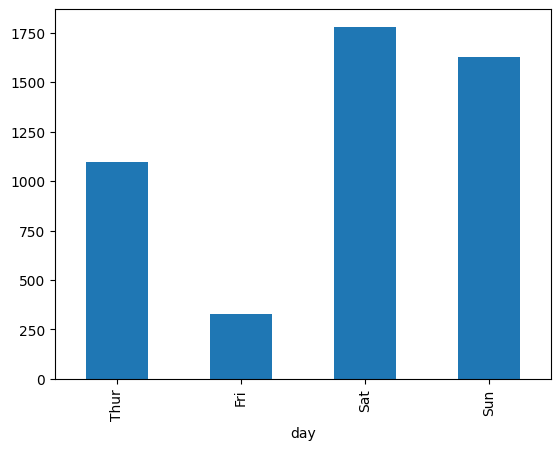

In [21]:
df.groupby('day')['total_bill'].sum() \
    .reindex(['Thur', 'Fri', 'Sat', 'Sun']) \
    .plot.bar()

<Axes: ylabel='smoker'>

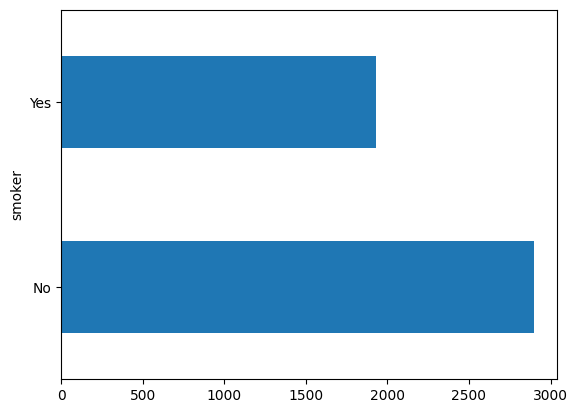

In [22]:
# sum(), count(), mean(), median(), max(), min()
df.groupby('smoker')['total_bill'].sum()\
.plot.barh()

## pie chart (tarta)

In [23]:
# value counts cuenta el número de observaciones o registros de cada categoría
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

<Axes: ylabel='count'>

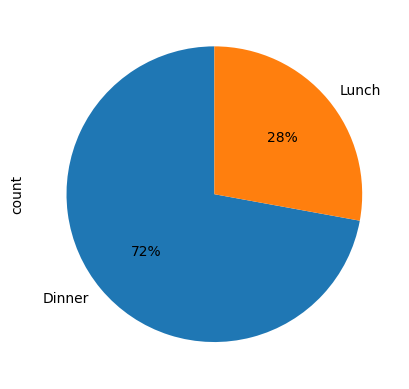

In [24]:
df['time'].value_counts().plot.pie(autopct='%1.0f%%', startangle=90)

## Scatter plot: gráfico de punto o gráfico de dispersión

In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


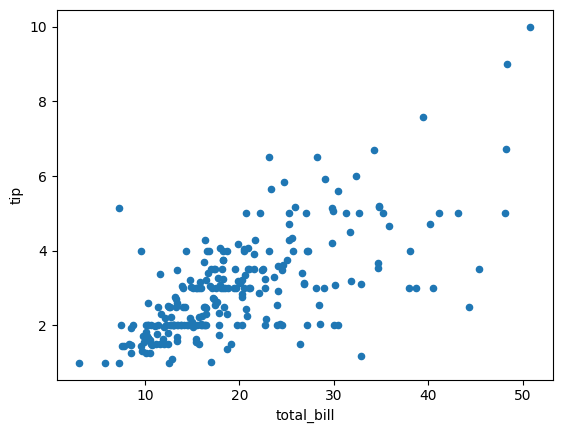

In [26]:
df.plot.scatter(x='total_bill', y='tip');

In [27]:
df['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

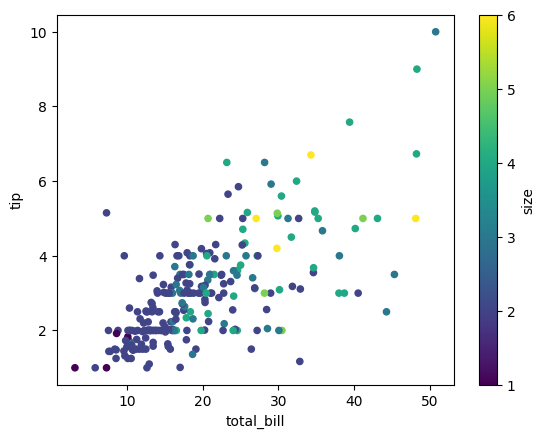

In [28]:
df.plot.scatter(x='total_bill', y='tip', c='size', colormap='viridis');

## hexbin plot

Colores oscuros muestran muchas observaciones concentradas.

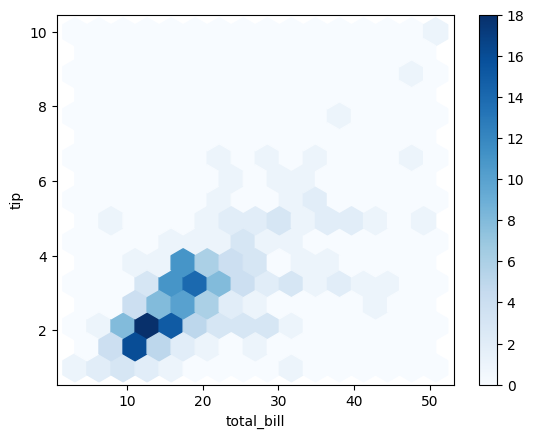

In [29]:
df.plot.hexbin(x='total_bill', y='tip', cmap='Blues', gridsize=15);

## area

<Axes: xlabel='day'>

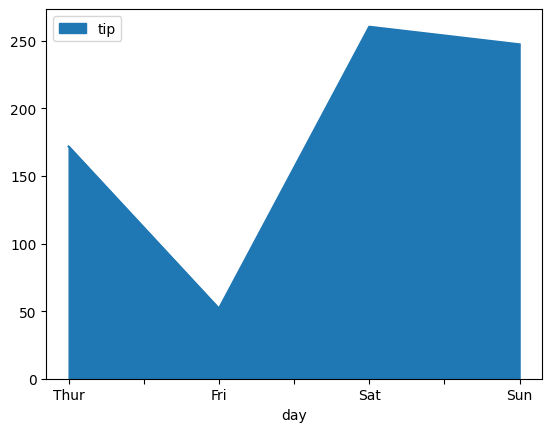

In [30]:
df.groupby('day')[['tip']].sum() \
    .reindex(['Thur', 'Fri', 'Sat', 'Sun']) \
    .plot.area()

<Axes: xlabel='day'>

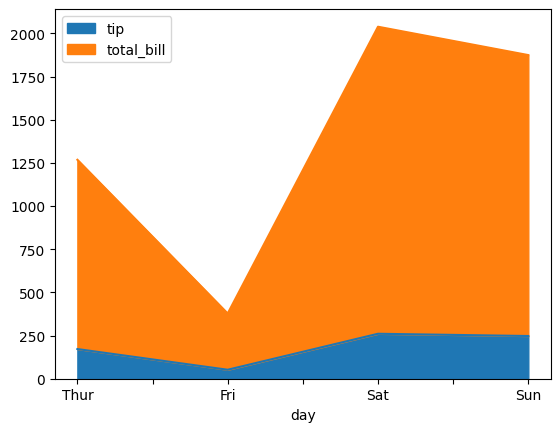

In [31]:
df.groupby('day')[['tip', 'total_bill']].sum() \
    .reindex(['Thur', 'Fri', 'Sat', 'Sun']) \
    .plot.area()

In [32]:
df.pivot_table(values='tip', aggfunc='sum', index='day', columns='smoker')

smoker,No,Yes
day,,
Fri,11.25,40.71
Sat,139.63,120.77
Sun,180.57,66.82
Thur,120.32,51.51


<Axes: xlabel='day'>

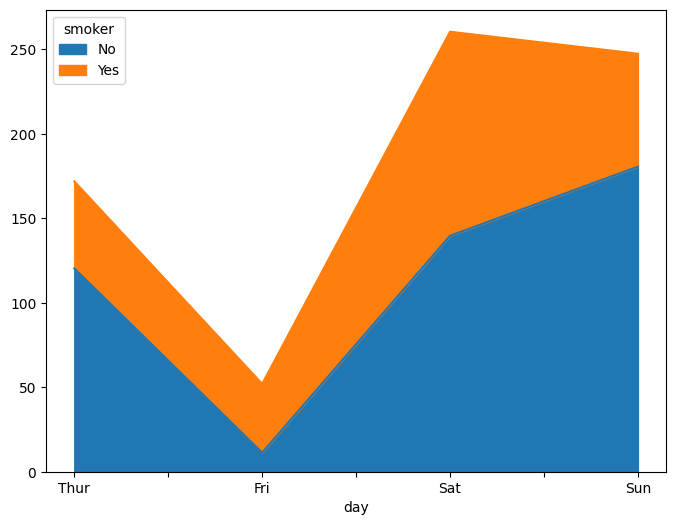

In [33]:
df.pivot_table(values='tip', aggfunc='sum', index='day', columns='smoker').reindex(['Thur', 'Fri', 'Sat', 'Sun']).plot.area(figsize=(8, 6))

## correlación con imshow

In [34]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


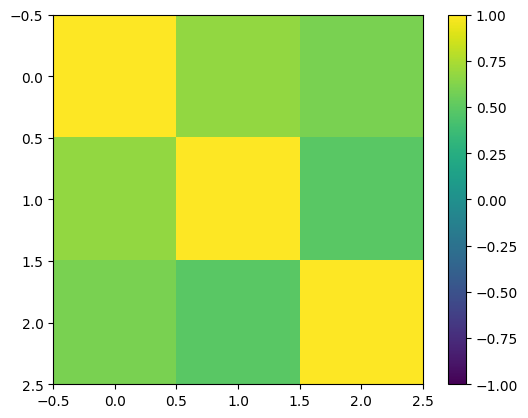

In [35]:
plt.imshow(df.corr(numeric_only=True), cmap='viridis', vmin=-1, vmax=1)
plt.colorbar()

In [36]:
df_encoded = pd.get_dummies(df, dtype=np.int8)
df_encoded.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0


In [37]:
df_encoded.corr()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
total_bill,1.000000,0.675734,0.598315,-0.144877,0.144877,-0.085721,0.085721,-0.086168,0.054919,0.122953,-0.138174,0.183118,-0.183118
tip,0.675734,1.000000,0.489299,-0.088862,0.088862,-0.005929,0.005929,-0.055463,-0.002790,0.125114,-0.095879,0.121629,-0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.086195,0.133178,-0.133178,-0.142184,-0.041121,0.193054,-0.072598,0.103411,-0.103411
sex_Female,-0.144877,-0.088862,-0.086195,1.000000,-1.000000,0.002816,-0.002816,0.071060,-0.053957,-0.168106,0.194445,-0.205231,0.205231
sex_Male,0.144877,0.088862,0.086195,-1.000000,1.000000,-0.002816,0.002816,-0.071060,0.053957,0.168106,-0.194445,0.205231,-0.205231
smoker_No,-0.085721,-0.005929,0.133178,0.002816,-0.002816,1.000000,-1.000000,-0.244316,-0.155744,0.181624,0.128534,-0.054921,0.054921
smoker_Yes,0.085721,0.005929,-0.133178,-0.002816,0.002816,-1.000000,1.000000,0.244316,0.155744,-0.181624,-0.128534,0.054921,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,0.071060,-0.071060,-0.244316,0.244316,1.000000,-0.216319,-0.195451,-0.169608,-0.058159,0.058159
day_Sat,0.054919,-0.002790,-0.041121,-0.053957,0.053957,-0.155744,0.155744,-0.216319,1.000000,-0.500682,-0.434480,0.462709,-0.462709
day_Sun,0.122953,0.125114,0.193054,-0.168106,0.168106,0.181624,-0.181624,-0.195451,-0.500682,1.000000,-0.392566,0.418071,-0.418071


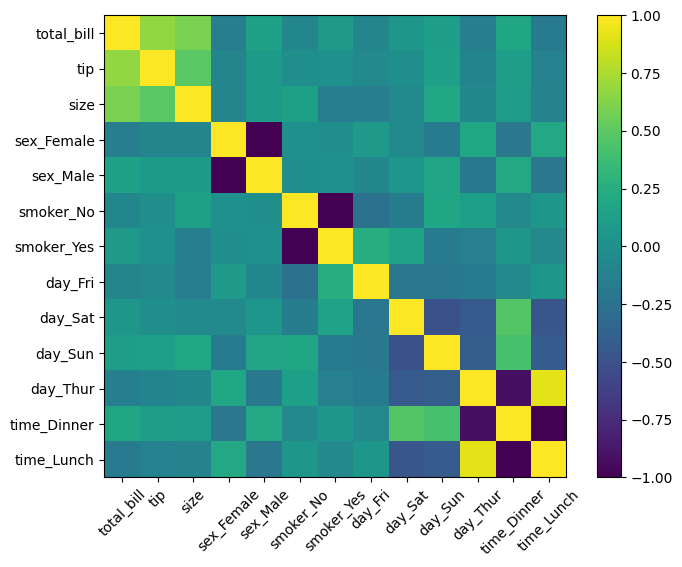

In [38]:
plt.figure(figsize = (8, 6))
plt.imshow(df_encoded.corr(), cmap='viridis', vmin=-1, vmax=1)
labels = df_encoded.corr().columns
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45);
plt.yticks(ticks=range(len(labels)), labels=labels);
plt.colorbar();

## subplots

Malla de varios gráficos dentro de una misma visualización

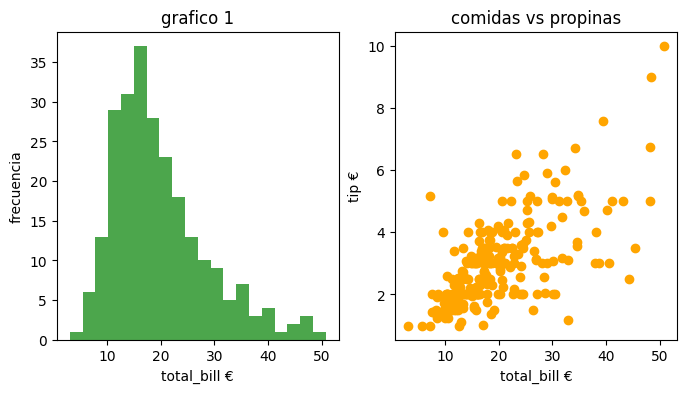

In [67]:
# plt.subplots(nrows=2, ncols=2)
fig, axes = plt.subplots(1, 2, figsize=(8,4))

axes[0].hist(df['total_bill'], bins=20, alpha=0.7, color='green');
axes[0].set_title('grafico 1')
axes[0].set_xlabel('total_bill €')
axes[0].set_ylabel('frecuencia')

axes[1].scatter(df['total_bill'], df['tip'], color='orange')
axes[1].set_title('comidas vs propinas')
axes[1].set_xlabel('total_bill €')
axes[1].set_ylabel('tip €');

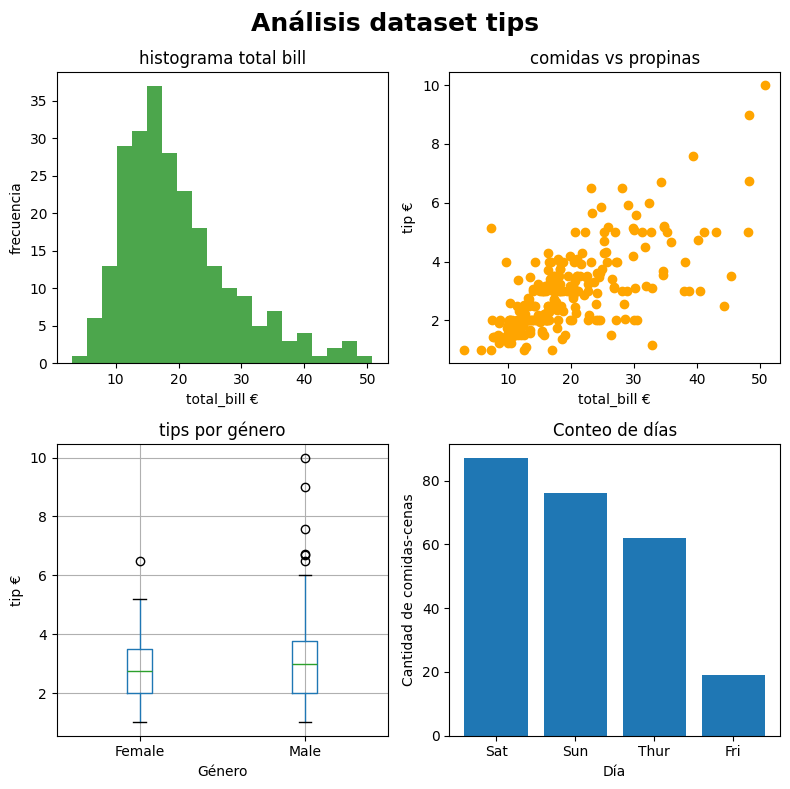

In [ ]:
# plt.subplots(nrows=2, ncols=2)
fig, axes = plt.subplots(2, 2, figsize=(8,8))


axes[0,0].hist(df['total_bill'], bins=20, alpha=0.7, color='green');
axes[0,0].set_title('histograma total bill')
axes[0,0].set_xlabel('total_bill €')
axes[0,0].set_ylabel('frecuencia')

axes[0,1].scatter(df['total_bill'], df['tip'], color='orange')
axes[0,1].set_title('comidas vs propinas')
axes[0,1].set_xlabel('total_bill €')
axes[0,1].set_ylabel('tip €')

df.boxplot(column='tip', by='sex', ax=axes[1,0])
axes[1,0].set_title('tips por género')
axes[1,0].set_xlabel('Género')
axes[1,0].set_ylabel('tip €');

day_counts = df['day'].value_counts()
axes[1,1].bar(day_counts.index, day_counts.values)
axes[1,1].set_title('Conteo de días')
axes[1,1].set_xlabel('Día')
axes[1,1].set_ylabel('Cantidad de comidas-cenas');

# CUIDADO: lo colocamos después de las gráficas para evitar que se sobrescriba
fig.suptitle("Análisis dataset tips", fontsize=18, fontweight='bold')

plt.tight_layout()